In [1]:
import numpy as np

import matplotlib.pyplot as plt
from funcs import plot_settings
plot_settings()

plt.rcParams["figure.figsize"] = (8, 8)

In [2]:
# Параметры для обучения
r = 1
sigma = 1e-1
size = 1000
target = np.empty((size, 2))

angle = np.random.random((size,))*2*np.pi

target[:, 0] = np.cos(angle) + np.random.normal(0, sigma, (size, ))
target[:, 1] = np.sin(angle) + np.random.normal(0, sigma, (size, ))


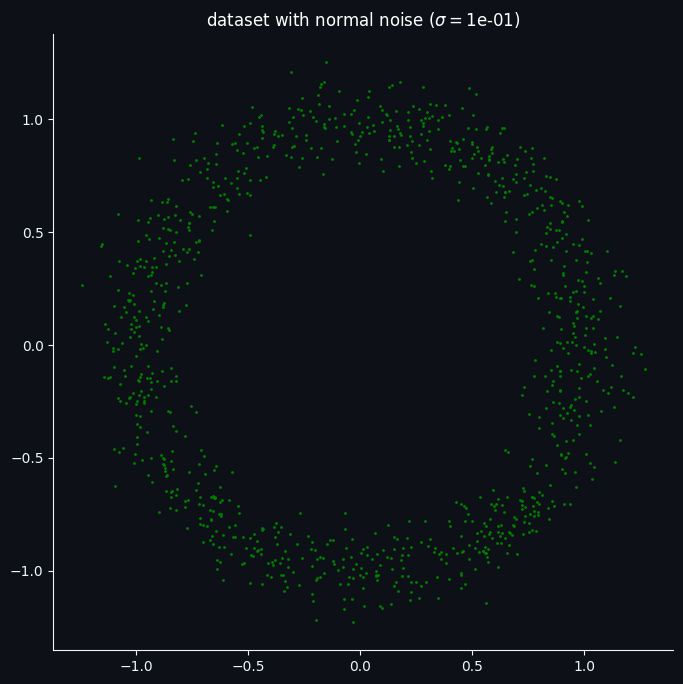

In [4]:
plt.scatter(target[:,0], target[:,1], 1)
plt.title(f"dataset with normal noise ($\sigma=${sigma:.0e})")
plt.show()

In [4]:
def circle(phi, r, center):
    res = np.empty((len(phi), 2))
    res[:, 0] = center[0] + r*np.cos(phi)
    res[:, 1] = center[1] + r*np.sin(phi)
    return res


In [7]:
class CircleRegression():

    def __init__(self, learning_rate: float = 1e-2, max_iter: int = 100, early_stop_eps: float = 1e-2):
        """regressor for 2D circle 

        Args:
            learning_rate (float, optional): gradient step. Defaults to 1e-2.
            max_iter (int, optional): max iteration for. Defaults to 100.
            early_stop_eps (float, optional): accuracy of error step. Defaults to 1e-2.
        """

        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.iter = 0
        self.early_stop_eps = early_stop_eps
        self.loss = []
        self.cur_loss = np.inf

    def fit(self, data: np.ndarray, target: np.ndarray):
        """fit with MSE loss

        Args:
            data (np.ndarray): data samples (phi)
            target (np.ndarray): xy coordinates

        Returns:
            CircleRegression: fitted regressor
        """

        self.data = data
        self.target = target

        self.m, self.n = data.shape

        self.R = 0
        self.C = np.zeros((self.n,))

        self.xy = np.empty_like(target)
        self.xy[:, 0] = np.cos(data).flatten()
        self.xy[:, 1] = np.sin(data).flatten()

        for _ in range(self.max_iter):
            self.update_weights()
            if abs(self.cur_loss - self.loss[-1]) < self.early_stop_eps:
                break
            self.cur_loss = self.loss[-1]
        self.cur_loss = self.loss[-1]

        return self

    def update_weights(self):

        Y_pred = self.predict(self.data)

        dW = -(2 * np.sum((self.xy.T).dot(self.target - Y_pred)) / self.m)
        db = -2 * np.sum(self.target - Y_pred, axis=0) / self.m

        self.R = self.R - self.learning_rate * dW
        self.C = self.C - self.learning_rate * db

        self.loss.append(np.sum((self.target - Y_pred)**2))
        self.iter += 1

        return self

    def predict(self, X):
        xy = np.empty_like(self.target)
        xy[:, 0] = np.sin(X.flatten())
        xy[:, 1] = np.cos(X.flatten())

        return self.R*self.xy + self.C

In [8]:
regressor = CircleRegression(learning_rate=1e-1,max_iter=1000, early_stop_eps=1e-3).fit(np.array([[a] for a in angle]), target)

In [9]:
predicted = regressor.predict(angle)

Text(0.5, 1.0, 'predicted R=1.0017, center: X_c = 0.0039, Y_c = -0.0050')

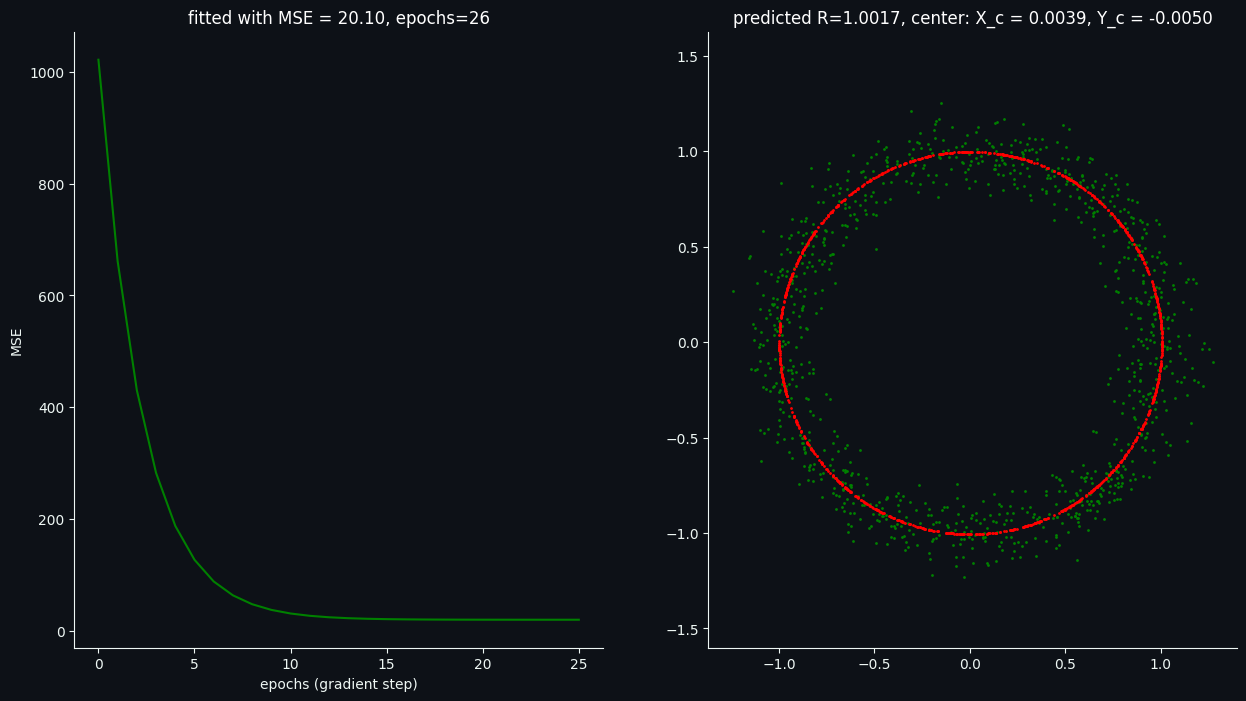

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))


axes[0].plot(regressor.loss)
axes[0].set_ylabel("MSE")
axes[0].set_xlabel("epochs (gradient step)")
axes[0].set_title(f"fitted with MSE = {regressor.cur_loss:.2f}, epochs={regressor.iter}")

axes[1].scatter(target[:,0], target[:,1], 1)

axes[1].scatter(predicted[:, 0], predicted[:,1], 1)
axes[1].axis("equal")
axes[1].set_title(f"predicted R={regressor.R:.4f}, center: X_c = {regressor.C[0]:.4f}, Y_c = {regressor.C[1]:.4f}")
